# Solow-model

In this project we are working with the Solow-model with human capital.
The parameters in the model are as follow:
1. $K_t$ is capital
* $H_t$ is human capital
* $L_t$ is labor
* $A_t$ is technology
* $Y_t$ is GDP


$Y_t=K_t^{\alpha}H_t^{\varphi}(A_tL_t)^{1-\alpha-\varphi}$

$K_{t-1}-K_t=s_KY_t-\delta K_t$

$H_{t-1}-H_t=s_HY_t-\delta H_t$


$s_K = \frac{Y_t}{I_t^{K}}$,
$s_H = \frac{Y_t}{I_t^{H}}$

We are stricltly working with capital per effective worker shown by the lowercase letters and a $\tilde{}$.

$\tilde{k}_t = \frac{K_t}{A_{t}L_{t}}$, $\tilde{h}_t = \frac{H_t}{A_{t}L_{t}}$

$\tilde{y}_t = \tilde{k}_t^{\alpha}\tilde{h}_t^{\varphi}$


Transition equations:

$\tilde{k}_{t+1} = \frac{1}{(1+n)(1+g)}(s_K \tilde{k}_t^{\alpha}\tilde{h}_t^{\varphi}+(1-\delta)\tilde{k}_t)$

$\tilde{h}_{t+1} = \frac{1}{(1+n)(1+g)}(s_H \tilde{k}_t^{\alpha}\tilde{h}_t^{\varphi}+(1-\delta)\tilde{h}_t)$

Solow equations:

$\tilde{k}_{t+1}-\tilde{k}_{t}=\frac{1}{(1+n)(1+g)}(s_K \tilde{k}_t^{\alpha}\tilde{h}_t^{\varphi}-(n+g+\delta+ng)\tilde{k}_{t})$

$\tilde{h}_{t+1}-\tilde{h}_{t}=\frac{1}{(1+n)(1+g)}(s_H \tilde{k}_t^{\alpha}\tilde{h}_t^{\varphi}-(n+g+\delta+ng)\tilde{h}_{t})$


$$$$

We want to simulate the transition from an initial capital level to the steady state levels. To do this we use the
transition equations as starting points.

The transition equations describe capital levels in the __next__ __period__ based on __current__ capital levels and parameter values:


$\alpha$: Parameter with regards to capital

$\varphi$: Parameter with regards to human capital

$\delta$: Depreciation rate

$s_K$: Saving rate with regards to capital

$s_H$: Saving rate with regards to human capital

n: Growth in population

g: Growth in technology

$$$$

Firstly, we define a function which creates an array containing the two transition equations.

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
from scipy import optimize


def transition_equation(k,h,alpha,phi,delta,sK,sH,n,g):
    """ calculate capital and human capital in the next-period
        
    Args:
    
        k (float): capital in this period
        h (float): human capital in this period
        alpha (float): Parameter wrt. capital, empirical around 1/3
        phi (float) = Parameter wrt. human capital, empirical around 1/3
        delta (float): depreciation rate
        sK (float): saving rate wrt. capital
        sH (float): saving rate wrt. human capital
        n (float): growth in population
        g (float): growth in technology
    
    Returns:
    
        k_plus (float): capital in next period
        h_plus (float): human capital in next period
        
    """
    #Transition Equations
    k_plus = (1/(1+n)*(1+g)) *(sK * k**(alpha) * h**(phi) + (1-delta)*k)    
    h_plus = (1/(1+n)*(1+g)) *(sH * k**(alpha) * h**(phi) + (1-delta)*h)
    
    return k_plus, h_plus
   


We then make a function which uses the transition equations to simulate the transition of the capital levels. 

It takes the parameter values as arguments but also an initial level of capital and human capital. From the parameter values and initial capital levels the function estimates the capital levels one period forward and saves these. The function then uses the new capital levels to estimate the capital levels one period later and saves these aswell. 

The function keeps repeating this for the specified number of periods, T. When T goes to infinity the capital levels go to their steady state values given the parameters.  

In [3]:
def simulate_solow_model(k0,h0,alpha,phi,delta,sK,sH,n,g,T):
    """ simulate the solow model
        
    Args:
    
        k0 (float): initial level of kapital
        h (float): initial level of human kapital
        alpha (float): Parameter wrt. capital, empirical around 1/3
        phi (float) = Parameter wrt. human capital, empirical around 1/3
        delta (float): depreciation rate
        sK (float): saving rate wrt. capital
        sH (float): saving rate wrt. human capital
        n (float): growth in population
        g (float): growth in technology
        T (int): number of periods to simulate
    
    Returns:
    
        k_path (list): capital path (length T)
        h_path (list): human capital path (length T)
        
    """
    
    # a. initialize
    k_path = [k0]
    h_path = [h0]
   
    
    # b. simulate forward
    for t in range(1,T):
        
        # i. apply transition equation
        k_plus = transition_equation(k_path[t-1],h_path[t-1],alpha,phi,delta,sK,sH,n,g)[0]  
        h_plus = transition_equation(k_path[t-1],h_path[t-1],alpha,phi,delta,sK,sH,n,g)[1] 
        
        # ii. save result
        k_path.append(k_plus)
        h_path.append(h_plus)
        
    return k_path, h_path


A 10 period example of the function with specified parameter values is seen below:

In [4]:
simulate_solow_model(0.3,0.5,0.3,0.3,0.05,0.15,0.13,0.05,0,10)

([0.3,
  0.3522877523410084,
  0.4047144441450239,
  0.45705558438359467,
  0.5091436705092961,
  0.5608498315099577,
  0.6120721867309576,
  0.6627283034203473,
  0.7127502171530581,
  0.762081085425558],
 [0.5,
  0.522458909171731,
  0.5472151032930342,
  0.5738667024489372,
  0.6020809616007525,
  0.6315764807702755,
  0.6621114146480014,
  0.6934753964631387,
  0.7254838296189005,
  0.7579737273833608])

We want so show the simulation graphically.

This is simply done by using the simulation function from above and plotting these in a graph. 

We then add widgets which makes changing the parameters easy and intuitive for the user. The effect of changing a parameter on the transition to the steady state of the capital levels is seen immediately. 

In [5]:
style = {'description_width': "initial"}

def simulation(k0=0.1,h0=0.1,alpha=0.3,phi=0.3,delta=0.05,sK=0.15,sH=0.14,n=0.05,g=0,T=200):
    """ simulate the solow model
        
    Args:
    
        k0 (float): initial level of kapital
        h (float): initial level of human kapital
        alpha (float): Parameter wrt. capital, empirical around 1/3
        phi (float) = Parameter wrt. human capital, empirical around 1/3
        delta (float): depreciation rate
        sK (float): saving rate wrt. capital
        sH (float): saving rate wrt. human capital
        n (float): growth in population
        g (float): growth in technology
        T (int): number of periods to simulate
    
    Returns:
    
        k_path (list): capital path (length T)
        h_path (list): human capital path (length T)
        
    """
    #Estimating the transitions using the simulation function specified earlier
    k_path = simulate_solow_model(k0,h0,alpha,phi,delta,sK,sH,n,g,T)[0]
    h_path = simulate_solow_model(k0,h0,alpha,phi,delta,sK,sH,n,g,T)[1]
    
    #Plotting the simulation in a graph.
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(k_path[:T],'r--',label="Capital")
    ax.plot(h_path[:T],label="Human capital")
    plt.legend()
    plt.title("Steady State for capital and human capital")

#Adding widgets to change the parameter values. 
import ipywidgets as widgets
widgets.interact(simulation,
    k0=widgets.FloatSlider(description=r"\(k_0\)", min=0, max=5, step=0.2, value=1, style=style),
    h0=widgets.FloatSlider(description=r"\(h_0\)", min=0, max=5, step=0.2, value=0.5, style=style),
    alpha=widgets.FloatSlider(description=r"\(\alpha\)", min=0, max=1, step=0.01, value=0.3,style=style),
    phi=widgets.FloatSlider(description=r"\(\varphi\)", min=0, max=1, step=0.01, value=0.3,style=style),
    delta=widgets.FloatSlider(description=r"\(\delta\)", min=0, max=1, step=0.01, value=0.05,style=style),
    sK=widgets.FloatSlider(description="sK", min=0, max=1, step=0.01, value=0.15, style=style),
    sH=widgets.FloatSlider(description="sH", min=0, max=1, step=0.01, value=0.15, style=style),
    n=widgets.FloatSlider(description=r"\(n\)", min=0, max=1, step=0.01, value=0.05, style=style),
    g=widgets.FloatSlider(description=r"\(g\)", min=0, max=1, step=0.01, value=0, style=style),
    T=widgets.IntSlider(description=r"\(T\)", min=1, max=500, step=5, value=150, style=style)
    );


interactive(children=(FloatSlider(value=1.0, description='\\(k_0\\)', max=5.0, step=0.2, style=SliderStyle(des…

To compare the graphically transition to a steady state with another method, we plot the graphical transition with predetermined  parameter values below:

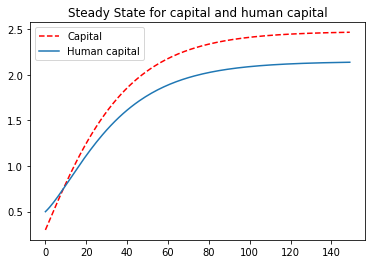

In [6]:
k0 =0.3
h0 =0.5
alpha = 0.3
phi = 0.3
delta = 0.05
sK = 0.15
sH = 0.13
n = 0.05
g = 0
T = 150

k_path = simulate_solow_model(k0,h0,alpha,phi,delta,sK,sH,n,g,T)[0]
h_path = simulate_solow_model(k0,h0,alpha,phi,delta,sK,sH,n,g,T)[1]


fig = plt.figure()
ax = fig.add_subplot(1,1,1)


ax.plot(k_path[:T],'r--',label="Capital")
ax.plot(h_path[:T], label="Human capital")
plt.legend()
plt.title("Steady State for capital and human capital")
plt.show()

Instead of finding the steady state with a simulation we try to do it with a derivative based method. With the same parameter values we should find similar steady state values. 

In this case we use the Solow equations:

Solow equations:

$\tilde{k}_{t+1}-\tilde{k}_{t}=\frac{1}{(1+n)(1+g)}(s_K \tilde{k}_t^{\alpha}\tilde{h}_t^{\varphi}-(n+g+\delta+ng)\tilde{k}_{t})$

$\tilde{h}_{t+1}-\tilde{h}_{t}=\frac{1}{(1+n)(1+g)}(s_H \tilde{k}_t^{\alpha}\tilde{h}_t^{\varphi}-(n+g+\delta+ng)\tilde{h}_{t})$

In steady state the capital per effective worker is the same in this period and the next which implies that the Solow equations above are equal to 0.

The Newton Method uses an initial guess of values as a starting point. It evaluates how far off this point is from satisfying the equation. With the derivate it evaluates which way to go for the next guess. It continues to do so and moves closer and closer to a satisfied condition.  

As we in this example have two conditions to satisfy, the method evaluates which way to go with the determinant of the Jacobian matrix instead of just the derivate of one of the equations as it is now minimizing a problem in three dimensions.



In [7]:
def solver(variables) :
    (k,h) = variables

    """ Solve for the optimal values in the Solow equations
        
    Args:
    
        variables (list): The list of the unknown values in the equations
    
    Returns:
    
       first_eq, second_eq (list): The values of the two equations equal to 0
     
        
    """
    #Specification of the two conditions
    first_eq = (1/(1+n)*(1+g)) *(sK * k**(alpha) * h**(phi) - (n+g+delta+n*g)*k)   
    second_eq = (1/(1+n)*(1+g)) *(sH * k**(alpha) * h**(phi) - (n+g+delta+n*g)*h)
    return [first_eq, second_eq]

#Optimize with the derivative method, Newton as standard
solution = optimize.fsolve(solver, (10,10))
print(solution)



[2.47523945 2.14520752]


With the same parameter values we find the capital level in steady state to be 2.475 and the human capital level in steady state to be 2.145. This is the same steady state values as we found in the simulation. 

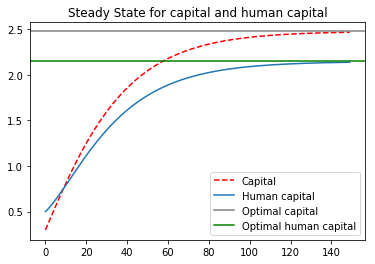

In [21]:
k_path = simulate_solow_model(k0,h0,alpha,phi,delta,sK,sH,n,g,T)[0]
h_path = simulate_solow_model(k0,h0,alpha,phi,delta,sK,sH,n,g,T)[1]


fig = plt.figure()
ax = fig.add_subplot(1,1,1)


ax.plot(k_path[:T],'r--',label="Capital")
ax.plot(h_path[:T], label="Human capital")
plt.axhline(solution[0], color="gray",label="Optimal capital")
plt.axhline(solution[1], color="green",label="Optimal human capital")
plt.legend()
plt.title("Steady State for capital and human capital")
plt.show()